In [0]:
# import fundamental
import numpy as np
import pandas as pd
from itertools import product
import time
import sys
import gc
import pickle
sys.version_info

# import ML
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from xgboost import plot_importance

# import warnings
import warnings
warnings.filterwarnings('ignore')

# import visualisation api
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.pylab as pylab
from matplotlib import cm
import seaborn as sns

# bg theme
plt.style.use(['seaborn-whitegrid'])

# font
font_fname = 'C:/Users/Admin/AppData/Local/Microsoft/Windows/Fonts/NanumGothicCoding.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

In [0]:
def plot_features(booster, figsize):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [0]:
items = pd.read_csv('c:/lois/kaggle/competitive-data-science-predict-future-sales/items.csv')
shops = pd.read_csv('c:/lois/kaggle/competitive-data-science-predict-future-sales/shops.csv')
cats = pd.read_csv('c:/lois/kaggle/competitive-data-science-predict-future-sales/item_categories.csv')
train = pd.read_csv('c:/lois/kaggle/competitive-data-science-predict-future-sales/sales_train.csv')
test = pd.read_csv('c:/lois/kaggle/competitive-data-science-predict-future-sales/test.csv').set_index('ID')

In [0]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [0]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [0]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 2 columns):
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(2)
memory usage: 4.9 MB


In [0]:
# preprocess

In [0]:
# clipping outliers

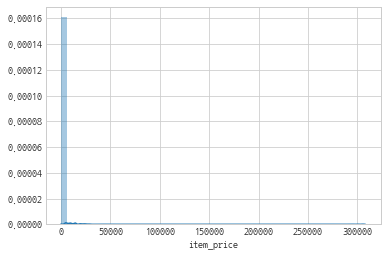

In [0]:
sns.distplot(train['item_price'])

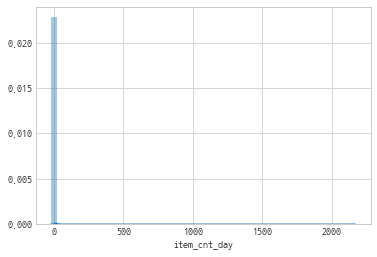

In [0]:
sns.distplot(train['item_cnt_day'])

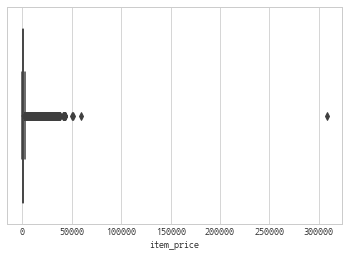

In [0]:
sns.boxplot(x=train.item_price)

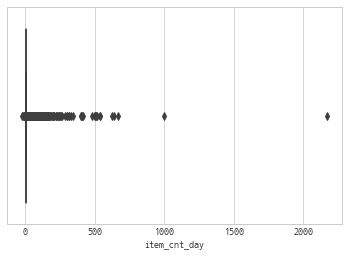

In [0]:
sns.boxplot(x=train.item_cnt_day)

In [0]:
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1001]

In [0]:
# scrubbing missing values

In [0]:
print(items.isnull().sum())
print('--------------------------')
print(shops.isnull().sum())
print('--------------------------')
print(cats.isnull().sum())
print('--------------------------')
print(train.isnull().sum())
print('--------------------------')
print(test.isnull().sum())

item_name           0
item_id             0
item_category_id    0
dtype: int64
--------------------------
shop_name    0
shop_id      0
dtype: int64
--------------------------
item_category_name    0
item_category_id      0
dtype: int64
--------------------------
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
--------------------------
shop_id    0
item_id    0
dtype: int64


In [0]:
train.median()

date_block_num      14.0
shop_id             31.0
item_id           9343.0
item_price         399.0
item_cnt_day         1.0
dtype: float64

In [0]:
train.loc[train.item_price<0, 'item_price'] = 1

In [0]:
# cleaning duplicated rows

In [0]:
print(items.duplicated().sum())
print('--------------------------')
print(shops.duplicated().sum())
print('--------------------------')
print(cats.duplicated().sum())
print('--------------------------')
print(train.duplicated().sum())
print('--------------------------')
print(test.duplicated().sum())

0
--------------------------
0
--------------------------
0
--------------------------
6
--------------------------
0


In [0]:
train.drop_duplicates(inplace=True)

In [0]:
print(train.duplicated().sum())

0


In [0]:
# cleaning shops

In [0]:
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'

In [0]:
shops['city'] = shops['shop_name'].str.split('').map(lambda x: x[0])

In [0]:
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

In [0]:
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])

In [0]:
shops = shops[['shop_id','city_code']]

In [0]:
shops.head()

,shop_id,city_code
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [0]:
# cleaning cats

In [0]:
cats['split'] = cats['item_category_name'].str.split('-')

In [0]:
cats['type'] = cats['split'].map(lambda x: x[0].strip())

In [0]:
cats['type_code'] = LabelEncoder().fit_transform(cats['type'])

In [0]:
cats['subtype'] = cats['split'].map(lambda x: x[1].strip() if len(x)>1 else x[0].strip())

In [0]:
cats['subtype_code'] = LabelEncoder().fit_transform(cats['subtype'])

In [0]:
cats = cats[['item_category_id', 'type_code', 'subtype_code']]

In [0]:
cats.head()

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


In [0]:
# cleaning items

In [0]:
items.drop(['item_name'], axis=1, inplace=True)

In [0]:
items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [0]:
len(list(set(test.item_id) - set(test.item_id).intersection(set(train.item_id)))), len(list(set(test.item_id))), len(test)

(363, 5100, 214200)

In [0]:
ts = time.time()
matrix = []
cols = ['date_block_num', 'shop_id', 'item_id']

In [0]:
ts

1582158897.1219485

In [0]:
for i in range(34):
    sales = train[train.date_block_num==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))

In [0]:
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)
time.time() - ts

13.581314325332642

In [0]:
matrix.head()

,date_block_num,shop_id,item_id
139255,0,0,19
141495,0,0,27
144968,0,0,28
142661,0,0,29
138947,0,0,32


In [0]:
train['revenue'] = train['item_price'] * train['item_cnt_day']

In [0]:
ts = time.time()
group = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day':['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)

In [0]:
group.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [0]:
matrix = pd.merge(matrix, group, on=cols, how='left')
matrix['item_cnt_month'] = (matrix['item_cnt_month'].fillna(0).clip(0,20).astype(np.float16))

In [0]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0


In [0]:
time.time() - ts

6.981455087661743

In [0]:
# test set

In [0]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)

In [0]:
test.head()

,shop_id,item_id,date_block_num
ID,,,
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34


In [0]:
ts = time.time()
matrix = pd.concat([matrix, test], ignore_index=True, sort=False, keys=cols)
matrix.fillna(0, inplace=True)

In [0]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0
...,...,...,...,...
11127999,34,45,18454,0.0
11128000,34,45,16188,0.0
11128001,34,45,15757,0.0
11128002,34,45,19648,0.0


In [0]:
time.time() - ts

1.0059211254119873

In [0]:
# shops, items, cats features

In [0]:
ts = time.time()
matrix = pd.merge(matrix, shops, on=['shop_id'], how='left')
matrix = pd.merge(matrix, items, on=['item_id'], how='left')
matrix = pd.merge(matrix, cats, on=['item_category_id'], how='left')
matrix['city_code'] = matrix['city_code'].astype(np.int8)
matrix['item_category_id'] = matrix['item_category_id'].astype(np.int8)
matrix['type_code'] = matrix['type_code'].astype(np.int8)
matrix['subtype_code'] = matrix['subtype_code'].astype(np.int8)

In [0]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_code,item_category_id,type_code,subtype_code
0,0,0,19,0.0,0,40,11,4
1,0,0,27,0.0,0,19,5,10
2,0,0,28,0.0,0,30,8,55
3,0,0,29,0.0,0,23,5,16
4,0,0,32,6.0,0,40,11,4
...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,0,55,13,2
11128000,34,45,16188,0.0,0,64,14,42
11128001,34,45,15757,0.0,0,55,13,2
11128002,34,45,19648,0.0,0,40,11,4


In [0]:
time.time() - ts

7.037731170654297

In [0]:
# target lags

In [0]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num', 'shop_id', 'item_id', col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num', 'shop_id', 'item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += 1
        df = pd.merge(df, shifted, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    return df

In [0]:
ts = time.time()
matrix = lag_feature(matrix, [1,2,3,6,12], 'item_cnt_month')

In [0]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
0,0,0,19,0.0,0,40,11,4,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0,23,5,16,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0,40,11,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,0,55,13,2,1.0,1.0,1.0,1.0,1.0
11128000,34,45,16188,0.0,0,64,14,42,0.0,0.0,0.0,0.0,0.0
11128001,34,45,15757,0.0,0,55,13,2,0.0,0.0,0.0,0.0,0.0
11128002,34,45,19648,0.0,0,40,11,4,0.0,0.0,0.0,0.0,0.0


In [0]:
time.time() - ts

37.388487577438354

In [0]:
# mean encoded features

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num']).agg({'item_cnt_month':['mean']})
group.columns = ['date_avg_item_cnt']
group.reset_index(inplace=True)

In [0]:
group.head()

,date_block_num,date_avg_item_cnt
0,0,0.347168
1,1,0.324463
2,2,0.355469
3,3,0.275391
4,4,0.265137


In [0]:
matrix = pd.merge(matrix, group, on=['date_block_num'], how='left')
matrix['date_avg_item_cnt'] = matrix['date_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_avg_item_cnt')
matrix.drop(['date_avg_item_cnt'], axis=1, inplace=True)

In [0]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt_lag_1
0,0,0,19,0.0,0,40,11,4,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0,23,5,16,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0,40,11,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,0,55,13,2,1.0,1.0,1.0,1.0,1.0,0.258545
11128000,34,45,16188,0.0,0,64,14,42,0.0,0.0,0.0,0.0,0.0,0.258545
11128001,34,45,15757,0.0,0,55,13,2,0.0,0.0,0.0,0.0,0.0,0.258545
11128002,34,45,19648,0.0,0,40,11,4,0.0,0.0,0.0,0.0,0.0,0.258545


In [0]:
time.time() - ts

16.58680510520935

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month':['mean']})
group.columns = ['date_item_avg_item_cnt']
group.reset_index(inplace=True)

In [0]:
matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id'], how='left')
matrix['date_item_avg_item_cnt'] = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_item_avg_item_cnt')
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)

In [0]:
time.time() - ts

49.12637114524841

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month':['mean']})
group.columns = ['date_shop_avg_item_cnt']
group.reset_index(inplace=True)

In [0]:
matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id'], how='left')
matrix['date_shop_avg_item_cnt'] = matrix['date_shop_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_shop_avg_item_cnt')
matrix.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)

In [0]:
time.time() - ts

47.569865226745605

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month':['mean']})
group.columns = ['date_cat_avg_item_cnt']
group.reset_index(inplace=True)

In [0]:
matrix = pd.merge(matrix, group, on=['date_block_num', 'item_category_id'], how='left')
matrix['date_cat_avg_item_cnt'] = matrix['date_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_cat_avg_item_cnt')
matrix.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)

In [0]:
time.time() - ts

50.86422157287598

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month':['mean']})
group.columns = ['date_shop_cat_avg_item_cnt']
group.reset_index(inplace=True)

In [0]:
matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
matrix['date_shop_cat_avg_item_cnt'] = matrix['date_shop_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_shop_cat_avg_item_cnt')
matrix.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)

In [0]:
time.time() - ts

53.27489686012268

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id', 'type_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_type_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'type_code'], how='left')
matrix['date_shop_type_avg_item_cnt'] = matrix['date_shop_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_type_avg_item_cnt')
matrix.drop(['date_shop_type_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

21.125673055648804

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix['date_shop_subtype_avg_item_cnt'] = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_subtype_avg_item_cnt')
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

21.44610095024109

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'city_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'city_code'], how='left')
matrix['date_city_avg_item_cnt'] = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_city_avg_item_cnt')
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

21.643622398376465

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id', 'city_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'city_code'], how='left')
matrix['date_item_city_avg_item_cnt'] = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_item_city_avg_item_cnt')
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

24.16404914855957

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'type_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_type_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'type_code'], how='left')
matrix['date_type_avg_item_cnt'] = matrix['date_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_type_avg_item_cnt')
matrix.drop(['date_type_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

21.85427188873291

In [0]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_subtype_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'subtype_code'], how='left')
matrix['date_subtype_avg_item_cnt'] = matrix['date_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_subtype_avg_item_cnt')
matrix.drop(['date_subtype_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

22.372653007507324

In [0]:
# trend features

In [0]:
ts = time.time()
group = train.groupby(['item_id']).agg({'item_price':['mean']})
group.columns = ['item_avg_item_price']
group.reset_index(inplace=True)

In [0]:
matrix = pd.merge(matrix, group, on=['item_id'], how='left')
matrix['item_avg_item_price'] = matrix['item_avg_item_price'].astype(np.float16)

In [0]:
group = train.groupby(['date_block_num', 'item_id']).agg({'item_price':['mean']})
group.columns = ['date_item_avg_item_price']
group.reset_index(inplace=True)

In [0]:
matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id'], how='left')
matrix['date_item_avg_item_price'] = matrix['date_item_avg_item_price'].astype(np.float16)

In [0]:
lags = [1,2,3,4,5,6]
matrix = lag_feature(matrix, lags, 'date_item_avg_item_price')

In [0]:
for i in lags:
    matrix['delta_price_lag_'+str(i)] = \
        (matrix['date_item_avg_item_price_lag_'+str(i)] - matrix['item_avg_item_price']) / matrix['item_avg_item_price']

In [0]:
def select_trend(row):
    for i in lags:
        if row['delta_price_lag_'+str(i)]:
            return row['delta_price_lag_'+str(i)]
    return 0

In [0]:
matrix['delta_price_lag'] = matrix.apply(select_trend, axis=1)
matrix['delta_price_lag'] = matrix['delta_price_lag'].astype(np.float16)
matrix['delta_price_lag'].fillna(0, inplace=True)

In [0]:
features_to_drop = ['item_avg_item_price', 'date_item_avg_item_price']
for i in lags:
    features_to_drop += ['date_item_avg_item_price_lag_'+str(i)]
    features_to_drop += ['delta_price_lag_'+str(i)]
matrix.drop(features_to_drop, axis=1, inplace=True)

In [0]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_shop_cat_avg_item_cnt_lag_3,date_shop_cat_avg_item_cnt_lag_6,date_shop_cat_avg_item_cnt_lag_12,date_shop_type_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,0,0,29,0.0,0,23,5,16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,0,0,32,6.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,0,55,13,2,1.0,1.0,...,0.126831,0.126831,0.126831,0.089294,0.126831,0.258545,0.045441,0.146973,0.196899,-0.475098
11128000,34,45,16188,0.0,0,64,14,42,0.0,0.0,...,0.094482,0.094482,0.094482,0.106201,0.094482,0.258545,0.022720,0.237305,0.155884,0.081116
11128001,34,45,15757,0.0,0,55,13,2,0.0,0.0,...,0.126831,0.126831,0.126831,0.089294,0.126831,0.258545,0.113647,0.146973,0.196899,0.155884
11128002,34,45,19648,0.0,0,40,11,4,0.0,0.0,...,0.083740,0.083740,0.083740,0.097046,0.083740,0.258545,0.045441,0.224243,0.220825,-0.091736


In [0]:
time.time() - ts

563.0098373889923

In [0]:
ts = time.time()
group = train.groupby(['date_block_num','shop_id']).agg({'revenue': ['sum']})
group.columns = ['date_shop_revenue']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

group = group.groupby(['shop_id']).agg({'date_shop_revenue': ['mean']})
group.columns = ['shop_avg_revenue']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['shop_id'], how='left')
matrix['shop_avg_revenue'] = matrix['shop_avg_revenue'].astype(np.float32)

matrix['delta_revenue'] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix['delta_revenue'] = matrix['delta_revenue'].astype(np.float16)

matrix = lag_feature(matrix, [1], 'delta_revenue')

matrix.drop(['date_shop_revenue','shop_avg_revenue','delta_revenue'], axis=1, inplace=True)
time.time() - ts

26.537419080734253

In [0]:
# special features

In [0]:
matrix['month'] = matrix['date_block_num'] % 12

In [0]:
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix['days'] = matrix['month'].map(days).astype(np.int8)

In [0]:
ts = time.time()
cache = {}
matrix['item_shop_last_sale'] = -1
matrix['item_shop_last_sale'] = matrix['item_shop_last_sale'].astype(np.int8)
for idx, row in matrix.iterrows():
    key = str(row.item_id)+''+str(row.shop_id)
    if key not in cache:
        if row.item_cnt_month != 0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        matrix.at[idx, 'item_shop_last_sale'] = row.date_block_num - last_date_block_num
        cache[key] = row.date_block_num
time.time() - ts

1116.8916189670563

In [0]:
ts = time.time()
cache = {}
matrix['item_last_sale'] = -1
matrix['item_last_sale'] = matrix['item_last_sale'].astype(np.int8)
for idx, row in matrix.iterrows():    
    key = row.item_id
    if key not in cache:
        if row.item_cnt_month!=0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        if row.date_block_num>last_date_block_num:
            matrix.at[idx, 'item_last_sale'] = row.date_block_num - last_date_block_num
            cache[key] = row.date_block_num         
time.time() - ts

751.6718275547028

In [0]:
ts = time.time()
matrix['item_shop_first_sale'] = matrix['date_block_num'] - matrix.groupby(['item_id', 'shop_id'])['date_block_num'].transform('min')
matrix['item_first_sale'] = matrix['date_block_num'] - matrix.groupby('item_id')['date_block_num'].transform('min')

In [0]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,0.000000,NaN,0,31,-1,-1,0,0
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,0.000000,NaN,0,31,-1,-1,0,0
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,0.000000,NaN,0,31,-1,-1,0,0
3,0,0,29,0.0,0,23,5,16,NaN,NaN,...,NaN,NaN,0.000000,NaN,0,31,-1,-1,0,0
4,0,0,32,6.0,0,40,11,4,NaN,NaN,...,NaN,NaN,0.000000,NaN,0,31,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,0,55,13,2,1.0,1.0,...,0.146973,0.196899,-0.475098,-0.290039,10,30,1,-1,11,11
11128000,34,45,16188,0.0,0,64,14,42,0.0,0.0,...,0.237305,0.155884,0.081116,-0.290039,10,30,-1,-1,2,2
11128001,34,45,15757,0.0,0,55,13,2,0.0,0.0,...,0.146973,0.196899,0.155884,-0.290039,10,30,1,-1,34,34
11128002,34,45,19648,0.0,0,40,11,4,0.0,0.0,...,0.224243,0.220825,-0.091736,-0.290039,10,30,-1,-1,11,11


In [0]:
time.time() - ts

7.240988731384277

In [0]:
ts = time.time()
matrix = matrix[matrix.date_block_num > 11]

In [0]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
4488710,12,2,27,0.0,0,19,5,10,0.0,0.0,...,1.034180,1.075195,-0.282715,1.211914,0,31,1,1,12,12
4488711,12,2,30,0.0,0,40,11,4,0.0,0.0,...,0.270020,0.291504,-0.483398,1.211914,0,31,1,1,11,11
4488712,12,2,31,0.0,0,37,11,1,0.0,0.0,...,0.270020,0.234009,-0.137451,1.211914,0,31,1,1,11,11
4488713,12,2,32,1.0,0,40,11,4,0.0,0.0,...,0.270020,0.291504,-0.407227,1.211914,0,31,-1,1,12,12
4488714,12,2,33,1.0,0,37,11,1,1.0,1.0,...,0.270020,0.234009,-0.225464,1.211914,0,31,1,1,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,0,55,13,2,1.0,1.0,...,0.146973,0.196899,-0.475098,-0.290039,10,30,1,-1,11,11
11128000,34,45,16188,0.0,0,64,14,42,0.0,0.0,...,0.237305,0.155884,0.081116,-0.290039,10,30,-1,-1,2,2
11128001,34,45,15757,0.0,0,55,13,2,0.0,0.0,...,0.146973,0.196899,0.155884,-0.290039,10,30,1,-1,34,34
11128002,34,45,19648,0.0,0,40,11,4,0.0,0.0,...,0.224243,0.220825,-0.091736,-0.290039,10,30,-1,-1,11,11


In [0]:
time.time() - ts

4.096824645996094

In [0]:
ts = time.time()
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            if ('item_cnt' in col):
                df[col].fillna(0, inplace=True)
    return df

In [0]:
matrix = fill_na(matrix)

In [0]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
4488710,12,2,27,0.0,0,19,5,10,0.0,0.0,...,1.034180,1.075195,-0.282715,1.211914,0,31,1,1,12,12
4488711,12,2,30,0.0,0,40,11,4,0.0,0.0,...,0.270020,0.291504,-0.483398,1.211914,0,31,1,1,11,11
4488712,12,2,31,0.0,0,37,11,1,0.0,0.0,...,0.270020,0.234009,-0.137451,1.211914,0,31,1,1,11,11
4488713,12,2,32,1.0,0,40,11,4,0.0,0.0,...,0.270020,0.291504,-0.407227,1.211914,0,31,-1,1,12,12
4488714,12,2,33,1.0,0,37,11,1,1.0,1.0,...,0.270020,0.234009,-0.225464,1.211914,0,31,1,1,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,0,55,13,2,1.0,1.0,...,0.146973,0.196899,-0.475098,-0.290039,10,30,1,-1,11,11
11128000,34,45,16188,0.0,0,64,14,42,0.0,0.0,...,0.237305,0.155884,0.081116,-0.290039,10,30,-1,-1,2,2
11128001,34,45,15757,0.0,0,55,13,2,0.0,0.0,...,0.146973,0.196899,0.155884,-0.290039,10,30,1,-1,34,34
11128002,34,45,19648,0.0,0,40,11,4,0.0,0.0,...,0.224243,0.220825,-0.091736,-0.290039,10,30,-1,-1,11,11


In [0]:
time.time() - ts

4.780782222747803

In [0]:
matrix.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'city_code',
       'item_category_id', 'type_code', 'subtype_code', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3', 'item_cnt_month_lag_6',
       'item_cnt_month_lag_12', 'date_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_2',
       'date_item_avg_item_cnt_lag_3', 'date_item_avg_item_cnt_lag_6',
       'date_item_avg_item_cnt_lag_12', 'date_shop_avg_item_cnt_lag_1',
       'date_shop_avg_item_cnt_lag_2', 'date_shop_avg_item_cnt_lag_3',
       'date_shop_avg_item_cnt_lag_6', 'date_shop_avg_item_cnt_lag_12',
       'date_cat_avg_item_cnt_lag_1', 'date_cat_avg_item_cnt_lag_2',
       'date_cat_avg_item_cnt_lag_3', 'date_cat_avg_item_cnt_lag_6',
       'date_cat_avg_item_cnt_lag_12', 'date_shop_cat_avg_item_cnt_lag_1',
       'date_shop_cat_avg_item_cnt_lag_2', 'date_shop_cat_avg_item_cnt_lag_3',
       'date_shop_cat_avg_item_cnt_lag_6', 'date_shop_c

In [0]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6639294 entries, 4488710 to 11128003
Data columns (total 48 columns):
date_block_num                          int8
shop_id                                 int8
item_id                                 int16
item_cnt_month                          float16
city_code                               int8
item_category_id                        int8
type_code                               int8
subtype_code                            int8
item_cnt_month_lag_1                    float16
item_cnt_month_lag_2                    float16
item_cnt_month_lag_3                    float16
item_cnt_month_lag_6                    float16
item_cnt_month_lag_12                   float16
date_avg_item_cnt_lag_1                 float16
date_item_avg_item_cnt_lag_1            float16
date_item_avg_item_cnt_lag_2            float16
date_item_avg_item_cnt_lag_3            float16
date_item_avg_item_cnt_lag_6            float16
date_item_avg_item_cnt_lag_12       

In [0]:
matrix.to_pickle('data.pkl')

In [0]:
matrix.to_csv('predictFutureSales.csv')

In [0]:
del matrix
del cache
del group
del items
del shops
del cats
del train
gc.collect();

In [0]:
# XGBOOST!

In [0]:
data = pd.read_pickle('data.pkl')

In [0]:
data

,date_block_num,shop_id,item_id,item_cnt_month,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
4488710,12,2,27,0.0,0,19,5,10,0.0,0.0,...,1.034180,1.075195,-0.282715,1.211914,0,31,1,1,0,0
4488711,12,2,30,0.0,0,40,11,4,0.0,0.0,...,0.270020,0.291504,-0.483398,1.211914,0,31,1,1,0,0
4488712,12,2,31,0.0,0,37,11,1,0.0,0.0,...,0.270020,0.234009,-0.137451,1.211914,0,31,1,1,0,0
4488713,12,2,32,1.0,0,40,11,4,0.0,0.0,...,0.270020,0.291504,-0.407227,1.211914,0,31,-1,1,0,0
4488714,12,2,33,1.0,0,37,11,1,1.0,1.0,...,0.270020,0.234009,-0.225464,1.211914,0,31,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,0,55,13,2,1.0,1.0,...,0.146973,0.196899,-0.475098,-0.290039,10,30,1,-1,11,11
11128000,34,45,16188,0.0,0,64,14,42,0.0,0.0,...,0.237305,0.155884,0.081116,-0.290039,10,30,-1,-1,2,2
11128001,34,45,15757,0.0,0,55,13,2,0.0,0.0,...,0.146973,0.196899,0.155884,-0.290039,10,30,1,-1,22,22
11128002,34,45,19648,0.0,0,40,11,4,0.0,0.0,...,0.224243,0.220825,-0.091736,-0.290039,10,30,-1,-1,11,11


In [0]:
data = data[[
    'date_block_num',
    'shop_id',
    'item_id',
    'item_cnt_month',
    'city_code',
    'item_category_id',
    'type_code',
    'subtype_code',
    'item_cnt_month_lag_1',
    'item_cnt_month_lag_2',
    'item_cnt_month_lag_3',
    'item_cnt_month_lag_6',
    'item_cnt_month_lag_12',
    'date_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_2',
    'date_item_avg_item_cnt_lag_3',
    'date_item_avg_item_cnt_lag_6',
    'date_item_avg_item_cnt_lag_12',
    'date_shop_avg_item_cnt_lag_1',
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12',
    'date_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_1',
    #'date_shop_type_avg_item_cnt_lag_1',
    #'date_shop_subtype_avg_item_cnt_lag_1',
    'date_city_avg_item_cnt_lag_1',
    'date_item_city_avg_item_cnt_lag_1',
    #'date_type_avg_item_cnt_lag_1',
    #'date_subtype_avg_item_cnt_lag_1',
    'delta_price_lag',
    'month',
    'days',
    'item_shop_last_sale',
    'item_last_sale',
    'item_shop_first_sale',
    'item_first_sale',
]]

In [0]:
# 13-33 months for train
X_train = data[data.date_block_num<33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num<33]['item_cnt_month']
# month 33 for validation
X_valid = data[data.date_block_num==33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num==33]['item_cnt_month']
# month 34 for test
X_test = data[data.date_block_num==34].drop(['item_cnt_month'], axis=1)

In [0]:
del data
gc.collect();

In [0]:
ts = time.time()

In [0]:
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300,
    colsample_bytree=0.8,
    subsample=0.8,
    eta=0.3,
    seed=42)

In [0]:
model.fit(X_train,
          Y_train,
          eval_metric='rmse',
          eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
          verbose=True,
          early_stopping_rounds=10)

[19:20:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:48] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.1266	validation_1-rmse:1.12085
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.09188	validation_1-rmse:1.08805
[2]	validation_0-rmse:1.06108	validation_1-rmse:1.0603
[3]	validation_0-rmse:1.02044	validation_1-rmse:1.0371
[4]	validation_0-rmse:0.995222	validation_1-rmse:1.01738
[5]	validation_0-rmse:0.974255	validation_1-rmse:0.999123
[6]	validation_0-rmse:0.956941	validation_1-rmse:0.985434
[7]	validation_0-rmse:0.940799	validation_1-rmse:0.974751
[8]	validation_0-rmse:0.92743	validation_1-rmse:0.967125
[9]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=300, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.8, verbosity=1)

In [0]:
time.time() - ts

2978.502563238144

In [0]:
Y_pred = model.predict(X_valid).clip(0,20)
Y_test = model.predict(X_test).clip(0,20)

In [0]:
submission = pd.DataFrame({"ID":test.index, "item_cnt_month":Y_test})
submission.to_csv('c:/lois/kaggle/xgboost_ver2.csv', index=False)

In [0]:
pickle.dump(Y_pred, open('xgboost_train.pickle', 'wb'))
pickle.dump(Y_test, open('xgboost_test.pickle', 'wb'))

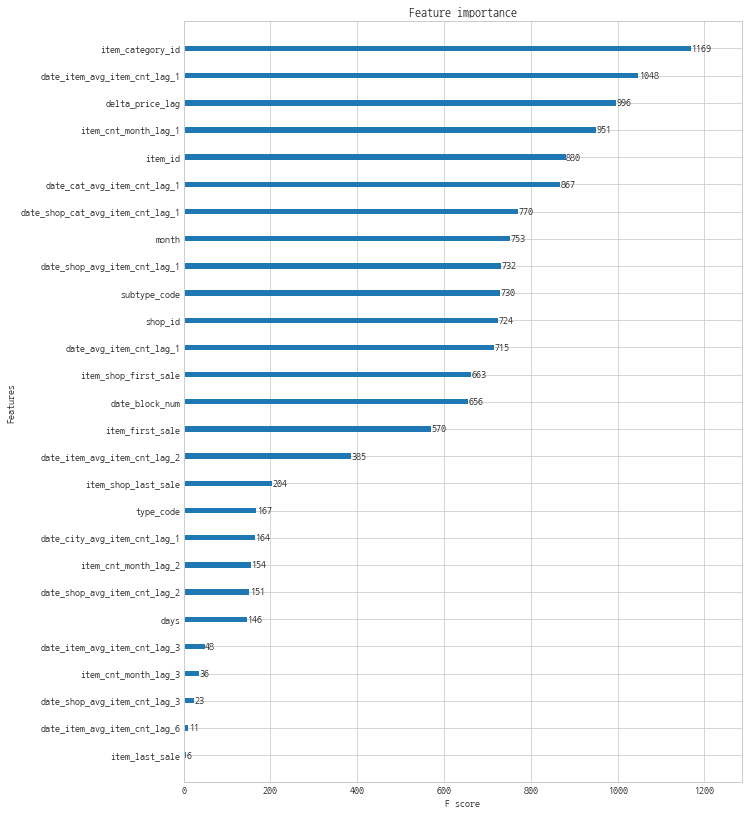

In [0]:
plot_features(model, (10,14))